# 3.	Import the required packages with their customary aliases as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

Rows and Columns

In [3]:
gdp_df.shape

(7176, 4)

Data Types

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

                    I dropped column but code disappered.  gdp_df.drop(columns = 'Value Footnotes')

In [5]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [6]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [7]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'country', 'Year':'year', 'Value':'gdp_per_capita'})
gdp_df.head()

,country,year,gdp_per_capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [8]:
gdp_years = gdp_df.groupby(['country'])['year'].count()
type(gdp_years)

pandas.core.series.Series

                        Lost code, but changed gdp_years from series to dataframe with to.frame()

In [9]:
type(gdp_years)

pandas.core.series.Series

In [10]:
gdp_years.drop(columns = 'level_0')
gdp_years.drop(columns = 'index')

country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
                               ..
Vietnam                        31
West Bank and Gaza             27
World                          31
Zambia                         31
Zimbabwe                       31
Name: year, Length: 242, dtype: int64

In [11]:
gdp_years = gdp_years.to_frame()

In [12]:
gdp_years = gdp_years.reset_index()

In [13]:
gdp_years

,country,year
0,Afghanistan,19
1,Africa Eastern and Southern,31
2,Africa Western and Central,31
3,Albania,31
4,Algeria,31
...,...,...
237,Vietnam,31
238,West Bank and Gaza,27
239,World,31
240,Zambia,31


In [14]:
gdp_years = gdp_years.rename(columns = {'year': 'count'})
gdp_years

,country,count
0,Afghanistan,19
1,Africa Eastern and Southern,31
2,Africa Western and Central,31
3,Albania,31
4,Algeria,31
...,...,...
237,Vietnam,31
238,West Bank and Gaza,27
239,World,31
240,Zambia,31


                                Countries with data for all years

In [15]:
gdp_years.loc[gdp_years['count'] == 31].count()

country    205
count      205
dtype: int64

                               Countries with less than 25 years recorded

In [16]:
gdp_years.loc[gdp_years['count'] < 25].count()

country    20
count      20
dtype: int64

                Number of observations increases over time, but decreses in 2019 and 2020

In [17]:
gdp_df.groupby(['year'])['country'].count()

year
1990    206
1991    207
1992    208
1993    209
1994    211
1995    222
1996    222
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    241
2020    240
Name: country, dtype: int64

# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [18]:
gdp_2020 = gdp_df.loc[gdp_df['year'] == 2020]
gdp_2020

,country,year,gdp_per_capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


#                                                        Histogram

C:\Users\bswil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'GDP_per_capita (2020)')

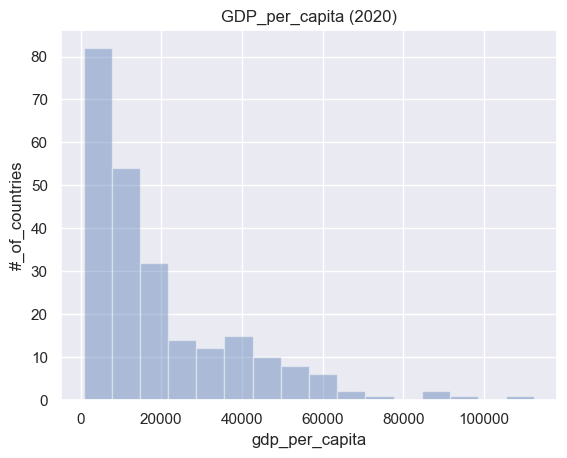

In [19]:
sns.set(style='darkgrid')
sns.distplot(a=gdp_2020['gdp_per_capita'], hist=True, kde=False, rug=False)
plt.xlabel('gdp_per_capita')
plt.ylabel('#_of_countries')
plt.title('GDP_per_capita (2020)')

# Density Plot

Text(0.5, 1.0, 'GDP-per_capita (2020)')

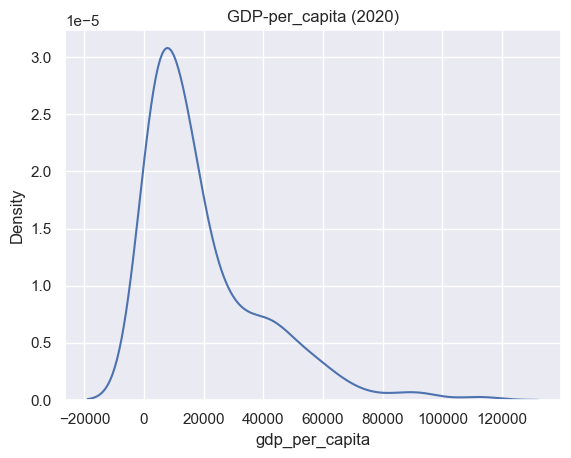

In [20]:
sns.set(style='darkgrid')
sns.kdeplot(gdp_2020['gdp_per_capita'])
plt.title('GDP-per_capita (2020)')

# Boxplot

<AxesSubplot:xlabel='country', ylabel='gdp_per_capita'>

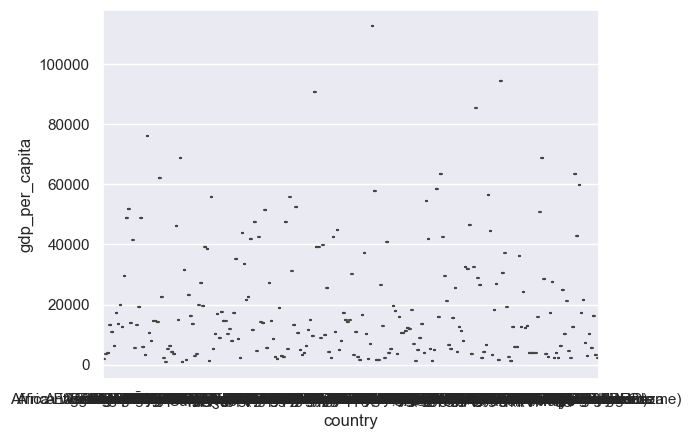

In [21]:
sns.set(style='darkgrid')
sns.boxplot( x=gdp_2020["country"], y=gdp_2020["gdp_per_capita"])

# Violin Plot

<AxesSubplot:xlabel='country', ylabel='gdp_per_capita'>

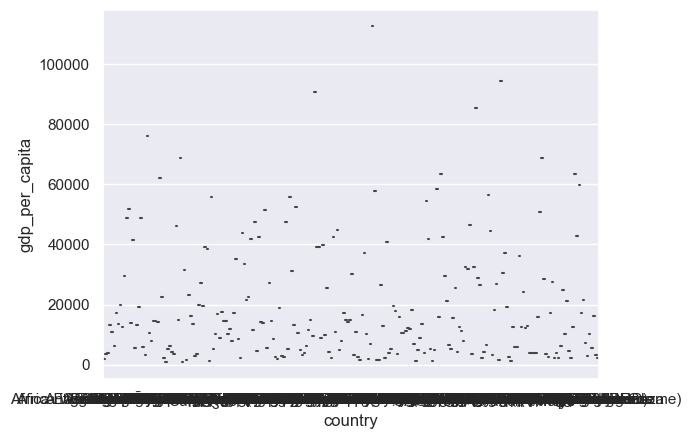

In [22]:
sns.set(style='darkgrid')
sns.violinplot(x=gdp_2020["country"], y=gdp_2020["gdp_per_capita"])

# 9. What was the median GDP per capita value in 2020?

In [23]:
gdp_2020['gdp_per_capita'].median()

12908.9374056206

# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

GDP grouped into 4 seperates years

In [24]:
gdp_decades = gdp_df.loc[(gdp_df['year'] == 1990) | (gdp_df['year'] == 2000) | (gdp_df['year'] == 2010) | (gdp_df['year'] == 2020)]

In [25]:
gdp_decades

,country,year,gdp_per_capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


# Boxplot

Text(0.5, 1.0, 'GDP_per_capita Grouped by Year')

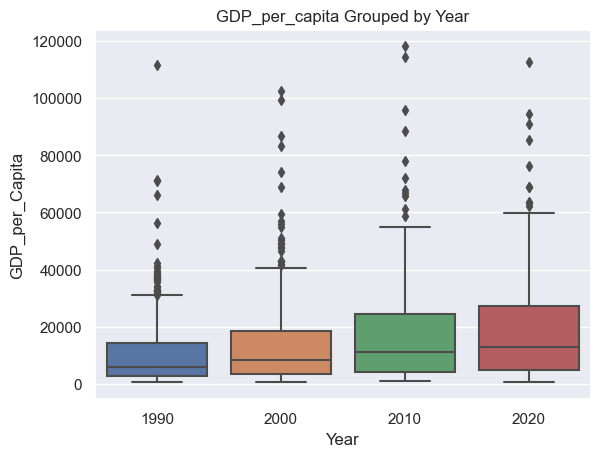

In [26]:
sns.set(style='darkgrid')
sns.boxplot( x=gdp_decades["year"], y=gdp_decades["gdp_per_capita"] )
plt.xlabel('Year')
plt.ylabel('GDP_per_Capita')
plt.title('GDP_per_capita Grouped by Year')

# Barplot

<AxesSubplot:xlabel='year', ylabel='gdp_per_capita'>

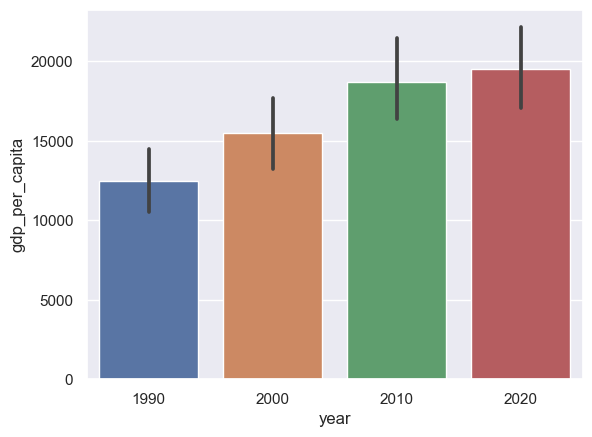

In [27]:
sns.barplot(x='year', y='gdp_per_capita', data=gdp_decades)

# Scatterplot

Text(0, 0.5, 'GDP_per_Capita')

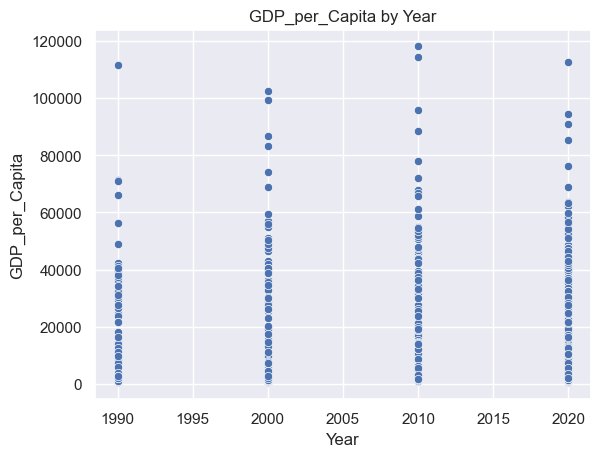

In [28]:
sns.scatterplot(x=gdp_decades['year'], y=gdp_decades['gdp_per_capita'])
plt.title('GDP_per_Capita by Year')
plt.xlabel('Year')
plt.ylabel('GDP_per_Capita')

# Scatterplot w/trend line overlaid

<AxesSubplot:xlabel='year', ylabel='gdp_per_capita'>

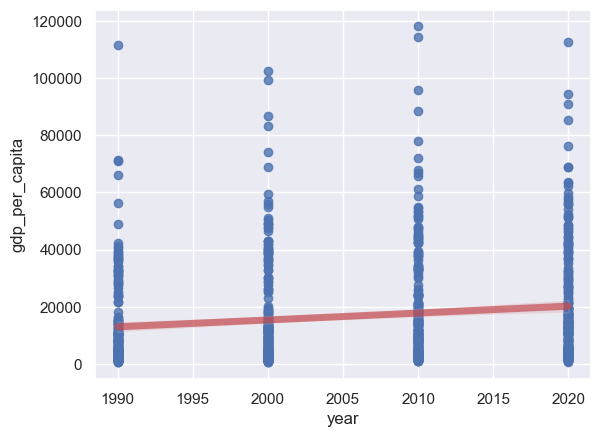

In [29]:
sns.regplot(x=gdp_decades['year'], y=gdp_decades['gdp_per_capita'], line_kws={'color':'r', 'alpha':0.7,'lw':5})

# 11. Which country was the first to have a GDP per capita greater than 100,000?


In [30]:
gdp_over_100 = gdp_df.loc[gdp_df['gdp_per_capita'] > 100000]
gdp_over_100

,country,year,gdp_per_capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681
3887,Luxembourg,2015,113182.728563
3888,Luxembourg,2014,113313.578898
3889,Luxembourg,2013,113050.663254
3890,Luxembourg,2012,112137.135491
3891,Luxembourg,2011,112998.390477


In [31]:
gdp_over_100.loc[gdp_over_100['year'] == min(gdp_over_100['year'])]

,country,year,gdp_per_capita
6838,United Arab Emirates,1990,111454.055665


# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Country with highest GDP per capita 2020

In [32]:
gdp_2020.loc[gdp_2020['gdp_per_capita'] == max(gdp_2020['gdp_per_capita'])]

,country,year,gdp_per_capita
3882,Luxembourg,2020,112557.309472


In [33]:
gdp_luxem = gdp_df.loc[gdp_df['country'] == 'Luxembourg']
gdp_luxem

,country,year,gdp_per_capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681
3887,Luxembourg,2015,113182.728563
3888,Luxembourg,2014,113313.578898
3889,Luxembourg,2013,113050.663254
3890,Luxembourg,2012,112137.135491
3891,Luxembourg,2011,112998.390477


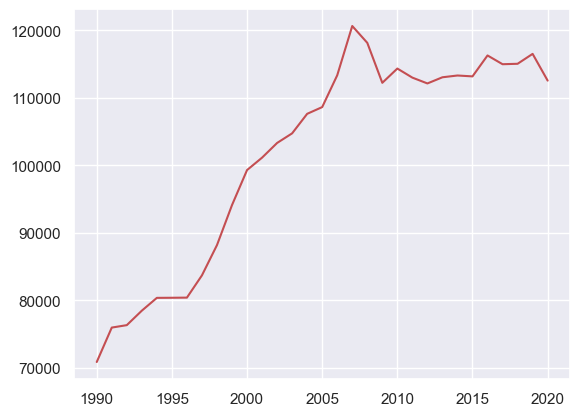

In [34]:
plt.plot('year', 'gdp_per_capita', data=gdp_luxem, color='r', alpha=1)

# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

Country with lowest GDP in 2020

In [35]:
gdp_2020.loc[gdp_2020['gdp_per_capita'] == min(gdp_2020['gdp_per_capita'])]

,country,year,gdp_per_capita
914,Burundi,2020,731.064074


In [36]:
gdp_burundi = gdp_df.loc[gdp_df['country'] == 'Burundi']
gdp_burundi

,country,year,gdp_per_capita
914,Burundi,2020,731.064074
915,Burundi,2019,751.443405
916,Burundi,2018,761.524143
917,Burundi,2017,773.572859
918,Burundi,2016,794.604340
919,Burundi,2015,825.205574
920,Burundi,2014,886.235296
921,Burundi,2013,877.272857
922,Burundi,2012,862.715651
923,Burundi,2011,852.502576


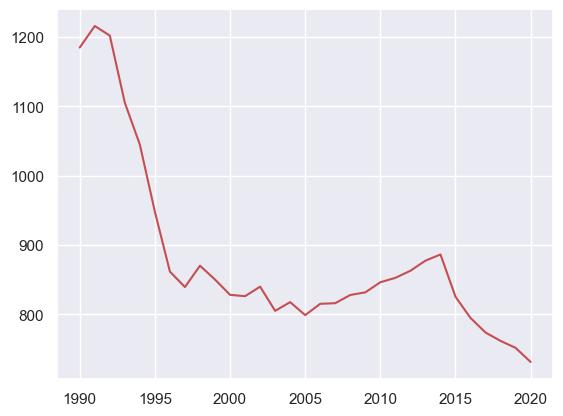

In [37]:
plt.plot('year', 'gdp_per_capita', data=gdp_burundi, color='r', alpha=1)

# **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [38]:
gdp_1990_2020 = gdp_df.loc[(gdp_df['year'] == 1990) | (gdp_df['year'] == 2020)]
gdp_1990_2020

,country,year,gdp_per_capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
49,Africa Eastern and Southern,1990,3083.976800
50,Africa Western and Central,2020,4021.293919
80,Africa Western and Central,1990,2810.341129
...,...,...,...
7113,World,1990,9704.621768
7114,Zambia,2020,3277.816510
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461


Ran into issues, moved on

# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [39]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4496, engine = 'python')
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [40]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [41]:
internet_df = internet_df.drop(columns = 'Value Footnotes')

In [42]:
internet_df = internet_df.rename(columns = {'Country or Area':'country', 'Year':'year', 'Value':'internet_users_pct'})

In [43]:
internet_df

,country,year,internet_users_pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


# 16. Look at the number of observations in this dataset per year. What do you notice?

In [44]:
internet_years = internet_df.value_counts('year')

In [45]:
internet_years = internet_years.to_frame()

In [46]:
internet_years = internet_years.reset_index()

In [47]:
internet_years.rename(columns = {'year':'year', '0':'count'})

,year,0
0,1990,210
1,2011,207
2,2007,206
3,2008,204
4,2012,203
5,2010,203
6,2009,203
7,2014,202
8,2013,202
9,2002,202


In [48]:
internet_years.sort_values(by='year')

,year,0
42,1960,7
26,1965,7
28,1970,7
29,1975,7
30,1976,7
31,1977,7
32,1978,7
33,1979,7
27,1980,7
35,1981,7


# 17. What is the first year to have a non-zero internet users percentage value?

In [49]:
internet_above_0 = internet_df.loc[internet_df['internet_users_pct'] > 0]

In [50]:
internet_above_0['year'].min()

1990

# 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [51]:
internet_2000_2014 = internet_df.loc[(internet_df['year'] == 2014) | (internet_df['year'] == 2000)]

In [52]:
internet_2000_2014.groupby(['year'])['internet_users_pct'].mean()

year
2000     8.886166
2014    45.249851
Name: internet_users_pct, dtype: float64

# 19. For how many countries was the percentage of internet users below 5% in 2014?

In [53]:
internet_2014 = internet_df.loc[internet_df['year'] == 2014]

In [54]:
internet_2014.loc[internet_2014['internet_users_pct'] < 5].count()

country               16
year                  16
internet_users_pct    16
dtype: int64

# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [55]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df,
                               on = ['country', 'year'], 
                               how = 'outer')

In [56]:
gdp_and_internet_use.head(10)

,country,year,gdp_per_capita,internet_users_pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,6.390000
7,Afghanistan,2013,2116.465258,5.900000
8,Afghanistan,2012,2075.491614,5.454545
9,Afghanistan,2011,1904.559926,5.000000


# 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [57]:
gdp_and_internet_use.loc[gdp_and_internet_use['year'] == 2014].nlargest(3, 'internet_users_pct')

,country,year,gdp_per_capita,internet_users_pct
2803,Iceland,2014,50450.741612,98.16
645,Bermuda,2014,77361.104881,96.80
4880,Norway,2014,62390.130313,96.30


In [58]:
gdp_ibn = gdp_and_internet_use.loc[(gdp_and_internet_use['country'] == 'Iceland')\
                         | (gdp_and_internet_use['country'] == 'Bermuda')\
                         | (gdp_and_internet_use['country'] == 'Norway')]
gdp_ibn

,country,year,gdp_per_capita,internet_users_pct
639,Bermuda,2020,76105.138057,NaN
640,Bermuda,2019,81681.726668,NaN
641,Bermuda,2018,81423.408453,NaN
642,Bermuda,2017,81834.955874,NaN
643,Bermuda,2016,78149.352535,NaN
...,...,...,...,...
7670,Iceland,1994,NaN,6.794812
7671,Iceland,1993,NaN,2.667825
7672,Iceland,1992,NaN,1.539160
7673,Iceland,1991,NaN,0.505129


<AxesSubplot:xlabel='year', ylabel='gdp_per_capita'>

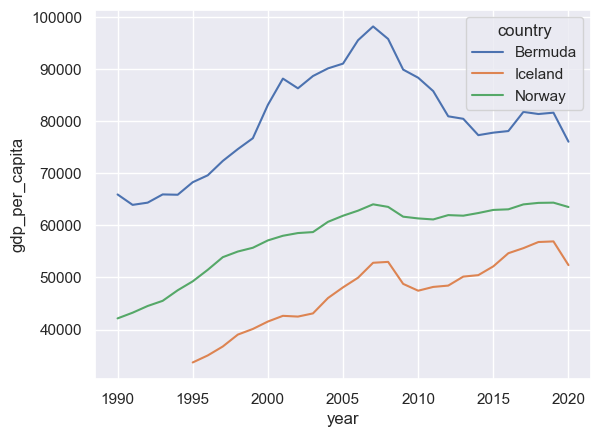

In [59]:
sns.lineplot(x='year', y='gdp_per_capita', data = gdp_ibn, hue='country')

# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [60]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['year'] == 2014]

In [61]:
gdp_and_internet_use_2014.head()

,country,year,gdp_per_capita,internet_users_pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09


# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

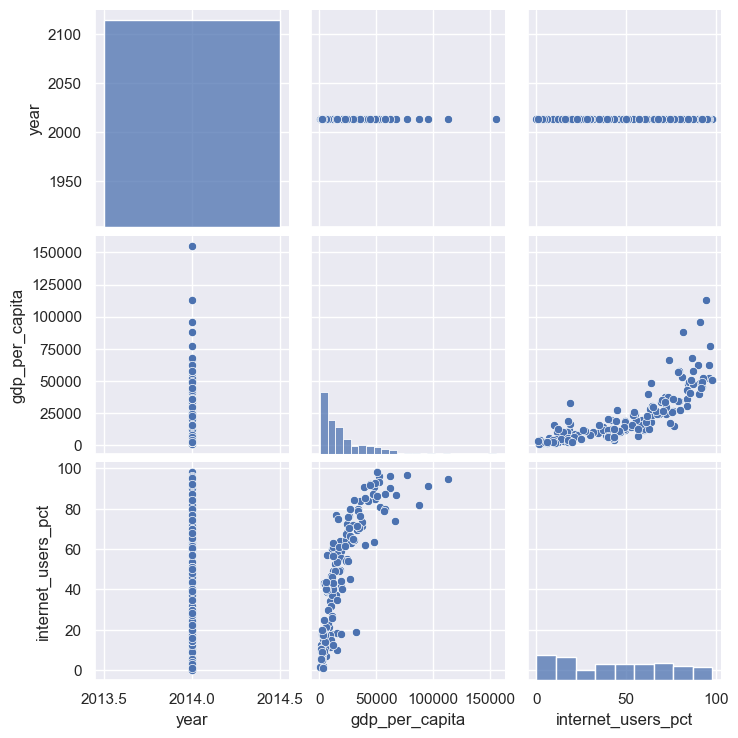

In [62]:
sns.pairplot(gdp_and_internet_use_2014)

# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [63]:
gdp_and_internet_use_2014

,country,year,gdp_per_capita,internet_users_pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09
...,...,...,...,...
8147,Turkey,2014,NaN,51.04
8170,Venezuela,2014,NaN,57.00
8194,Viet Nam,2014,NaN,48.31
8214,Virgin Islands (U.S.),2014,NaN,50.07


In [64]:
bin_labels = ['low', 'medium', 'high']

In [65]:
gdp_and_internet_use_2014 = gdp_and_internet_use_2014.reset_index(drop=True)

In [66]:
gdp_and_internet_use_2014['gdp_group'] = pd.qcut(gdp_and_internet_use_2014['gdp_per_capita'],
                                                 q=3,
                                                 labels=bin_labels)

In [67]:
gdp_and_internet_use_2014

,country,year,gdp_per_capita,internet_users_pct,gdp_group
0,Afghanistan,2014,2102.384604,6.39,low
1,Africa Eastern and Southern,2014,3677.319414,NaN,low
2,Africa Western and Central,2014,4215.646000,NaN,low
3,Albania,2014,11586.833878,60.10,medium
4,Algeria,2014,11512.690472,18.09,medium
...,...,...,...,...,...
276,Turkey,2014,NaN,51.04,NaN
277,Venezuela,2014,NaN,57.00,NaN
278,Viet Nam,2014,NaN,48.31,NaN
279,Virgin Islands (U.S.),2014,NaN,50.07,NaN
